In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid

from helpers import eval_model

%matplotlib inline

## Data Loading and Preprocessing

In [2]:
generated=pd.read_csv("../../datasets/generated.csv")
display(generated)

,0,1,2,3,label
0,-0.525336,3.623456,1.680293,2.075983,0
1,9.534497,-8.348758,0.112068,6.815969,1
2,8.524880,-7.082612,-0.868522,5.211075,1
3,6.826851,-8.784989,0.090649,4.446359,1
4,-2.591003,5.138362,1.059329,1.319494,0
...,...,...,...,...,...
19995,6.590158,-8.562936,0.964792,5.984862,1
19996,8.715324,-7.847383,-0.415671,6.783874,1
19997,6.547144,-8.264512,-1.492629,5.186666,1
19998,-0.781900,4.160036,5.067404,8.881871,2


### Seperating X and Y from Dataset

In [3]:
y=generated["label"]
x=generated.drop(["label",],axis=1)

In [4]:
x.describe()

,0,1,2,3
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.057691,0.055582,1.629570,5.726769
std,4.040587,5.332695,1.687016,3.509535
min,-4.400123,-11.219695,-4.276724,-2.116425
25%,-1.042873,-6.659021,0.341375,2.004535
50%,-0.020341,3.021220,1.769409,6.388002
75%,6.940277,4.110598,2.907363,8.823314
max,11.044036,7.411504,6.789665,13.484701


### Normalizing the values of X and Splitting dataset into a training and a cross validation set
Doing a 60:40 split of the dataset for training and cross-validation

In [53]:
temp =x.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)

x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.6)


In [54]:
x_norm.head()

,0,1,2,3
0,0.250890,0.796683,0.538298,0.268725
1,0.902258,0.154093,0.396588,0.572548
2,0.836886,0.222051,0.307978,0.469678
3,0.726940,0.130679,0.394652,0.420661
4,0.117139,0.877993,0.482186,0.220235


# Model Evaluation



## Multi-layer Perceptron (Neural Network)

We use a neural network with no hidden layers. Using Adam Optimizer along with an initial learning rate of 0.01. 


In [55]:
clf = MLPClassifier(solver='adam', learning_rate_init=1e-2,hidden_layer_sizes=(),tol=10e-5, random_state=1,verbose=True,max_iter=100,batch_size=32)

In [56]:
clf.fit(x_train,y_train)

Iteration 1, loss = 0.58669892
Iteration 2, loss = 0.23004959
Iteration 3, loss = 0.12932620
Iteration 4, loss = 0.08456272
Iteration 5, loss = 0.06034104
Iteration 6, loss = 0.04563172
Iteration 7, loss = 0.03581783
Iteration 8, loss = 0.02895856
Iteration 9, loss = 0.02393649
Iteration 10, loss = 0.02012695
Iteration 11, loss = 0.01715082
Iteration 12, loss = 0.01477816
Iteration 13, loss = 0.01289029
Iteration 14, loss = 0.01130685
Iteration 15, loss = 0.01001370
Iteration 16, loss = 0.00892390
Iteration 17, loss = 0.00801650
Iteration 18, loss = 0.00722721
Iteration 19, loss = 0.00657777
Iteration 20, loss = 0.00600178
Iteration 21, loss = 0.00550024
Iteration 22, loss = 0.00507701
Iteration 23, loss = 0.00470269
Iteration 24, loss = 0.00438532
Iteration 25, loss = 0.00411025
Iteration 26, loss = 0.00386652
Iteration 27, loss = 0.00364611
Iteration 28, loss = 0.00348063
Iteration 29, loss = 0.00331699
Iteration 30, loss = 0.00316904
Iteration 31, loss = 0.00305396
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

#### Evaluating Multi-layer Perceptron 

Test Accuracy : 100.0 %
Train Accuracy : 100.0 %


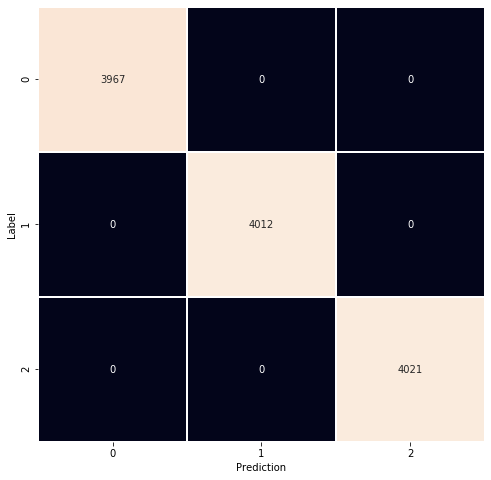

In [57]:
eval_model(clf,x_test,y_test,x_train,y_train)

## Support Vector Machine (SVM) Classifier

In [58]:
clf=SVC(kernel='rbf')

In [59]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Evaluation

Test Accuracy : 100.0 %
Train Accuracy : 100.0 %


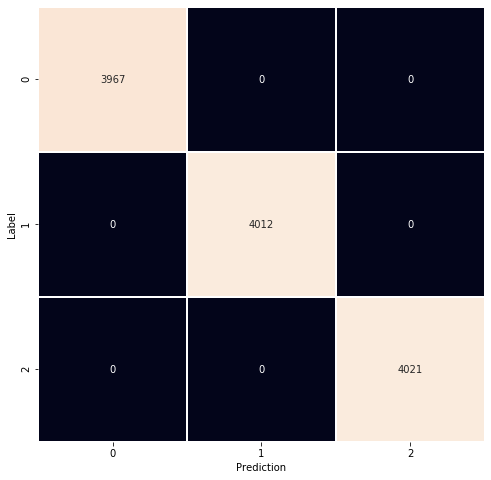

In [60]:
eval_model(clf,x_test,y_test,x_train,y_train)

## Stochastic Gradient Descent 

Using a log loss function and a learning rate of 0.01)

In [61]:
clf=SGDClassifier(loss="log",verbose=True,max_iter=100)

In [62]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 19.71, NNZs: 4, Bias: 5.643650, T: 8000, Avg. loss: 0.018814
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 19.56, NNZs: 4, Bias: 5.638320, T: 16000, Avg. loss: 0.010719
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 19.59, NNZs: 4, Bias: 5.584477, T: 24000, Avg. loss: 0.010763
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.54, NNZs: 4, Bias: 5.670340, T: 32000, Avg. loss: 0.010735
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 19.52, NNZs: 4, Bias: 5.741194, T: 40000, Avg. loss: 0.010733
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 19.51, NNZs: 4, Bias: 5.802945, T: 48000, Avg. loss: 0.010793
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 19.52, NNZs: 4, Bias: 5.747550, T: 56000, Avg. loss: 0.010745
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 19.52, NNZs: 4, Bias: 5.710176, T: 64000, Avg. loss: 0.010728
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 19.52, NNZs: 4, Bias: 5.731519, T: 72000, Avg. loss: 0.010761
Total trai

Norm: 20.58, NNZs: 4, Bias: -15.080808, T: 40000, Avg. loss: 0.012999
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 20.56, NNZs: 4, Bias: -15.134020, T: 48000, Avg. loss: 0.013025
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 20.54, NNZs: 4, Bias: -15.164484, T: 56000, Avg. loss: 0.012972
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 20.55, NNZs: 4, Bias: -15.162613, T: 64000, Avg. loss: 0.012959
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 20.61, NNZs: 4, Bias: -15.095093, T: 72000, Avg. loss: 0.012999
Total training time: 0.01 seconds.
-- Epoch 10
Norm: 20.58, NNZs: 4, Bias: -15.138685, T: 80000, Avg. loss: 0.012986
Total training time: 0.01 seconds.
-- Epoch 11
Norm: 20.56, NNZs: 4, Bias: -15.164002, T: 88000, Avg. loss: 0.012961
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 20.63, NNZs: 4, Bias: -15.084521, T: 96000, Avg. loss: 0.012956
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 20.60, NNZs: 4, Bias: -15.125446, T: 104000, Avg. loss: 0.0129

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=True, warm_start=False)

#### Evaluation

Test Accuracy : 100.0 %
Train Accuracy : 100.0 %


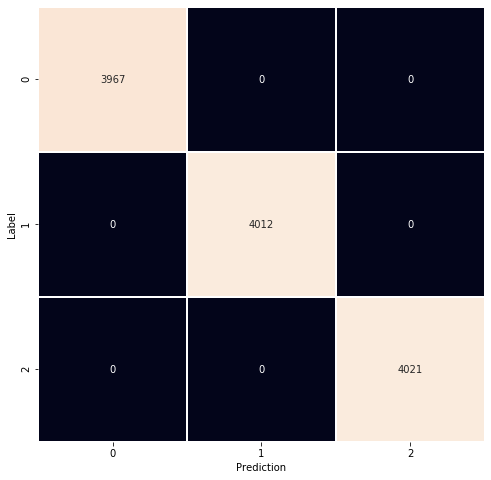

In [63]:
eval_model(clf,x_test,y_test,x_train,y_train)

## Nearest Centroid Classifier

In [64]:
clf=NearestCentroid()

In [65]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

#### Evaluation

Test Accuracy : 100.0 %
Train Accuracy : 100.0 %


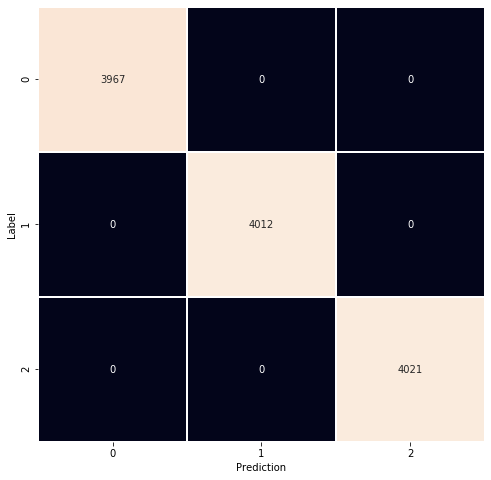

In [66]:
eval_model(clf,x_test,y_test,x_train,y_train)

## Descision Tree Classifier 

In [67]:
clf=DecisionTreeClassifier()          

In [68]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Evaluation

Test Accuracy : 100.0 %
Train Accuracy : 100.0 %


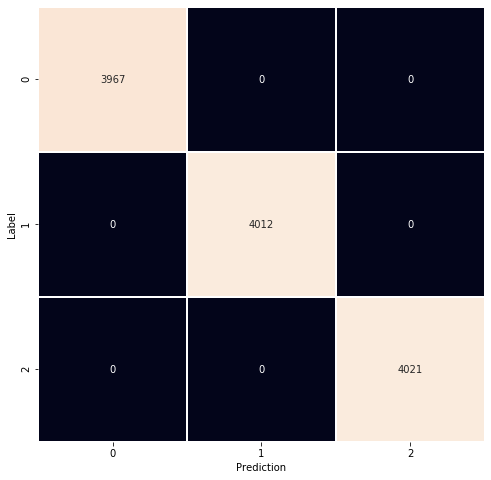

In [69]:
eval_model(clf,x_test,y_test,x_train,y_train)